<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/notebooks/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [56]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
color="#01748F"
!git clone https://github.com/{user}/{repo}.git

fatal: destination path 'forest_height' already exists and is not an empty directory.


In [57]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py

<Figure size 640x480 with 0 Axes>

In [58]:
X_train, y_train, X_test, y_test = load_data("color_channels_ndvi")

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
# train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
# k-fold cross-validation for hyperparameter tuning of max_depth
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': [x for x in range(1,11)],
                                'min_samples_split': [x for x in range(1,61,10)]},
                  cv=3,
                  scoring='neg_mean_absolute_error')

gs.fit(X_train, y_train)

In [35]:
from sklearn.model_selection import GridSearchCV
# k-fold cross-validation for hyperparameter tuning of max_depth
gs = GridSearchCV(dt,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(2, 60, 10)},
                  cv=5,
                  scoring='neg_mean_absolute_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 2, 'min_samples_split': 2}
9.962108704825493


In [62]:
dt = DecisionTreeRegressor(max_depth=2, min_samples_split=2)
# train the model with optimized parameters
dt.fit(X_train, y_train)
# predict test set
y_pred = gs.predict(X_test)
# evaluate model
mae_color_channels_ndvi, mse_color_channels_ndvi, rmse_color_channels_ndvi, mape_color_channels_ndvi = evaluate_model(y_test, y_pred)

MAE: 10.076813953490454; MSE: 137.34788747072193; RMSE: 3.17439977846056; MAPE: 1.301852048087964


Save Model with all features

In [65]:
import joblib
%cd forest_height/models
# save model
joblib.dump(dt, f'decison_trees_color_channels_NDVI_{round(mae_color_channels_ndvi,2)}.joblib')
%cd ../../
# load model with:
# dt = joblib.load("forest_height/models/decison_trees_color_channels_NDVI_10.08.joblib")

/content/forest_height/models
/content


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.12281
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.87719


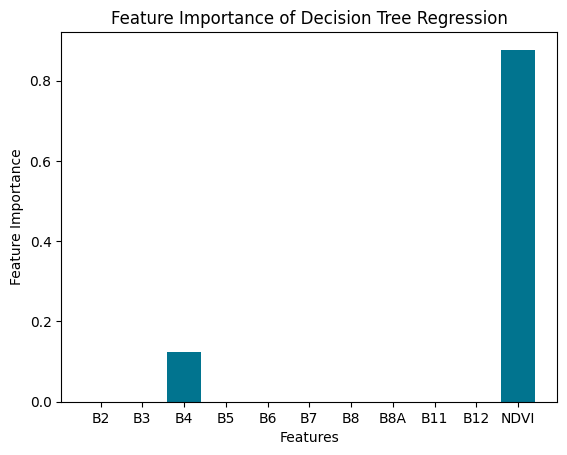

In [64]:
import matplotlib.pyplot as plt
# get importance
# importance = rf_random.coef_
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI'], importance, color=color)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Decision Tree Regression")
plt.show()

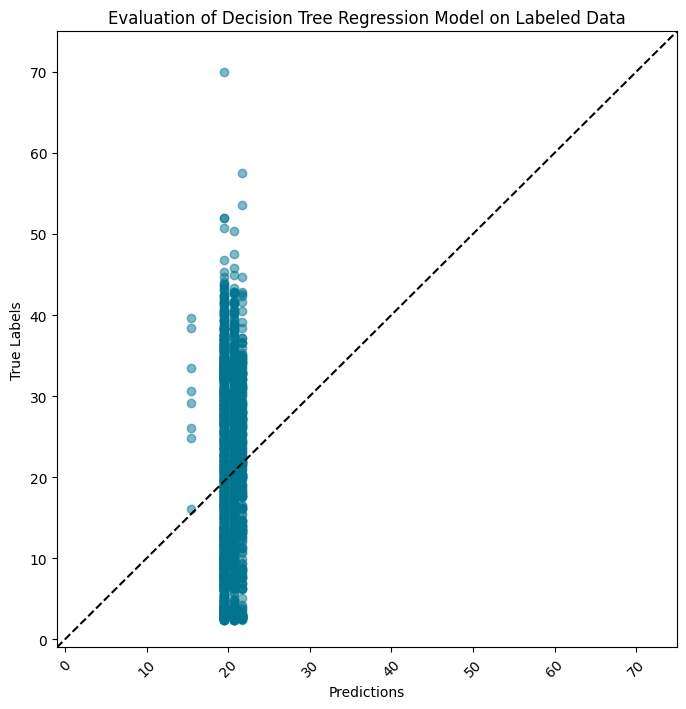

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# visualize predictions vs. true labels
fig = plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test, color=color, alpha=0.5)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-1,75], [-1, 75], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-1,75])
plt.ylim([-1,75])
plt.title("Evaluation of Decision Tree Regression Model on Labeled Data")
plt.show()

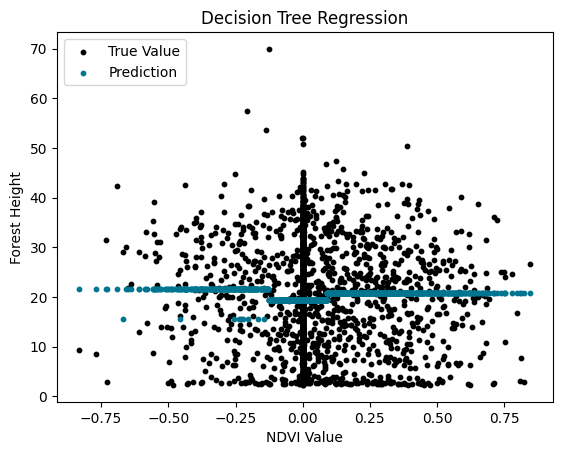

In [68]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
fig, ax = plt.subplots()
plt.scatter(X_test[:,10], y_test, 10, color='black')
plt.scatter(X_test[:,10], y_pred, 10, color=color)
plt.title('Decision Tree Regression')
plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Prediction"), loc='upper left')
plt.show()

Fit Model on Color Channels

In [52]:
X_train, y_train, X_test, y_test = load_data("color_channels")
# train model
dt.fit(X_train, y_train)
# predict test set
y_pred = dt.predict(X_test)
# evaluate model
mae_color_channels, mse_color_channels, rmse_color_channels, mape_color_channels = evaluate_model(y_test, y_pred)

MAE: 10.120643029083249; MSE: 137.80751085323476; RMSE: 3.181295809742195; MAPE: 1.2802194310346724


Fit Model on NDVI

In [53]:
X_train, y_train, X_test, y_test = load_data("ndvi")
# reshape to fit model
X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
# train model
dt.fit(X_train, y_train)
# predict test set
y_pred = dt.predict(X_test)
# evaluate model
mae_color_ndvi, mse_color_ndvi, rmse_color_ndvi, mape_color_ndvi = evaluate_model(y_test, y_pred)

MAE: 10.024194370966914; MSE: 136.3848106951077; RMSE: 3.1661008150352563; MAPE: 1.2621682918256745


Save Model

In [54]:
import joblib
%cd forest_height/models
# save model
joblib.dump(dt, f'decison_trees_NDVI_{round(mae_ndvi,2)}.joblib')
%cd ../../
# load model with:
# dt = joblib.load("forest_height/models/decison_trees_NDVI_10.02.joblib")

/content/forest_height/models
/content
